#### Multicollinearity Analysis

This notebook performs a **multicollinearity** analysis on the sentiment and uncertainty indices to prepare the data for the econometric models. High correlation between predictor variables can lead to unstable regression coefficients, making it difficult to interpret the individual impact of each index.
* It loads the previously generated `index_optimism.xlsx` and `index_uncertainty.xlsx` files.
* It visualizes the correlation matrices for both the optimism and uncertainty indices separately and aggregated using **heatmaps**.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

sns.set_theme(style="white")

In [2]:
df_optimism = pd.read_excel("./data/processed/index_optimism.xlsx")
df_uncertainty = pd.read_excel("./data/processed/index_uncertainty.xlsx")

In [3]:
def calculate_vif(df):
    X = add_constant(df)
    
    vif_df = pd.DataFrame()
    vif_df["feature"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    vif_df = vif_df[vif_df["feature"] != "const"]
    vif_df = vif_df.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    
    return vif_df

# OPTIMISM INDEX

#### Corr Matrix

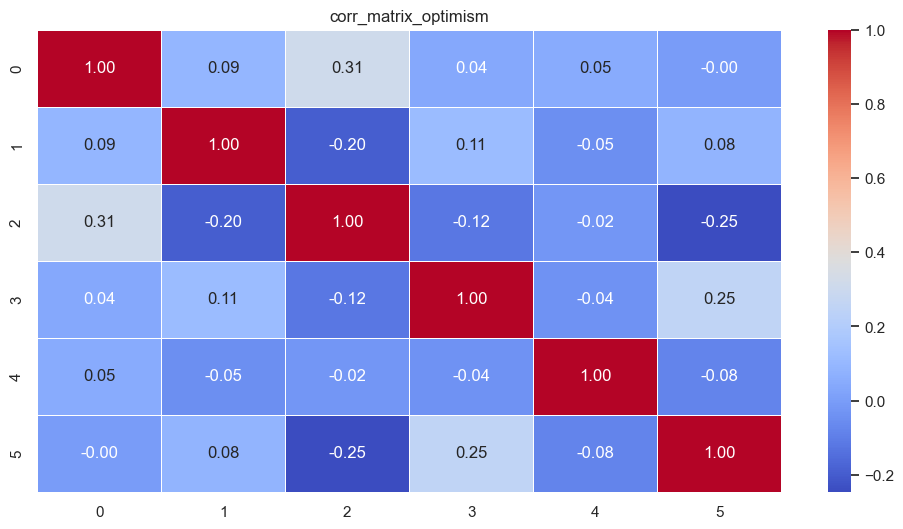

In [4]:
df_optimism = df_optimism.select_dtypes(include=['number'])

corr_matrix_optimism = df_optimism.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix_optimism, 
    annot=True,     
    fmt=".2f",      
    cmap='coolwarm',
    linewidths=.5
)
plt.title('corr_matrix_optimism')
plt.show()

#### VIF Results

In [5]:
vif_results_optimism = calculate_vif(df_optimism)
print(vif_results_optimism)

  feature       VIF
0       2  1.259178
1       0  1.152239
2       5  1.138537
3       3  1.084467
4       1  1.080910
5       4  1.017801


# UNCERTAINTY INDEX

#### Corr Matrix

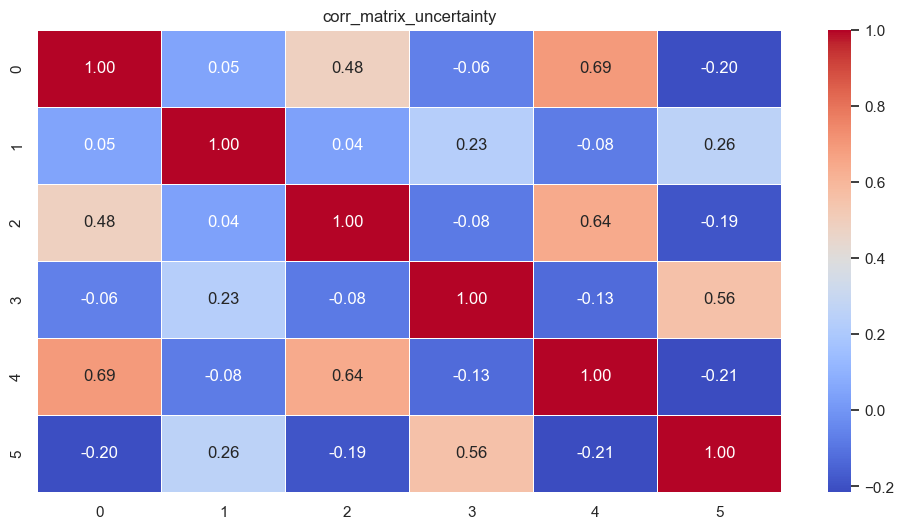

In [6]:
# 2 and 6 are highly correlated, is this a problem?
df_uncertainty = df_uncertainty.select_dtypes(include=['number'])

corr_matrix_uncertainty = df_uncertainty.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix_uncertainty, 
    annot=True,     
    fmt=".2f",      
    cmap='coolwarm',
    linewidths=.5
)
plt.title('corr_matrix_uncertainty')
plt.show()

#### VIF Results

In [7]:
vif_results_uncertainty = calculate_vif(df_uncertainty)
print(vif_results_uncertainty)

  feature       VIF
0       4  2.609767
1       0  2.004696
2       2  1.741078
3       5  1.574708
4       3  1.476044
5       1  1.132305


# BOTH

In [8]:
df_optimism.columns = [f"optimism_{i}" for i in range(len(df_optimism.columns))]
df_uncertainty.columns = [f"uncertainty_{i}" for i in range(len(df_uncertainty.columns))]

In [9]:
df_full = pd.merge(df_optimism, df_uncertainty, on=df_optimism.index)
df_full.drop("key_0", axis=1, inplace=True)

#### Corr Matrix

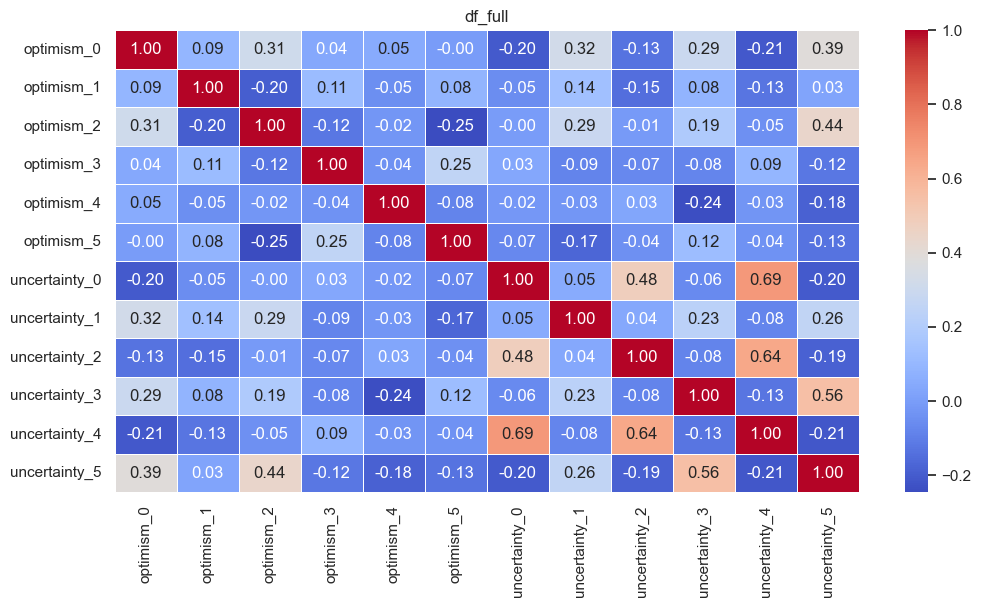

In [10]:
# 2 and 6 are highly correlated, is this a problem?
corr_matrix_full= df_full.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix_full, 
    annot=True,     
    fmt=".2f",      
    cmap='coolwarm',
    linewidths=.5
)
plt.title('df_full')
plt.show()

#### VIF Results

In [11]:
vif_results_full = calculate_vif(df_full)
print(vif_results_full)

          feature       VIF
0   uncertainty_4  2.688883
1   uncertainty_0  2.052662
2   uncertainty_5  1.985602
3   uncertainty_2  1.808687
4   uncertainty_3  1.647826
5      optimism_2  1.476884
6      optimism_0  1.394725
7   uncertainty_1  1.301648
8      optimism_5  1.235943
9      optimism_3  1.151920
10     optimism_1  1.148078
11     optimism_4  1.106394
